In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
import pandas as pd
iris_df = pd.read_csv("Iris.csv")

# Display the dataset
print(iris_df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
# Display the first few rows of the dataset
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Display the columns
print(iris_df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [7]:
# Extract features
X = iris_df.iloc[:, 1:5]

In [10]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Determine the Optimal Number of Clusters Using the Elbow Method
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

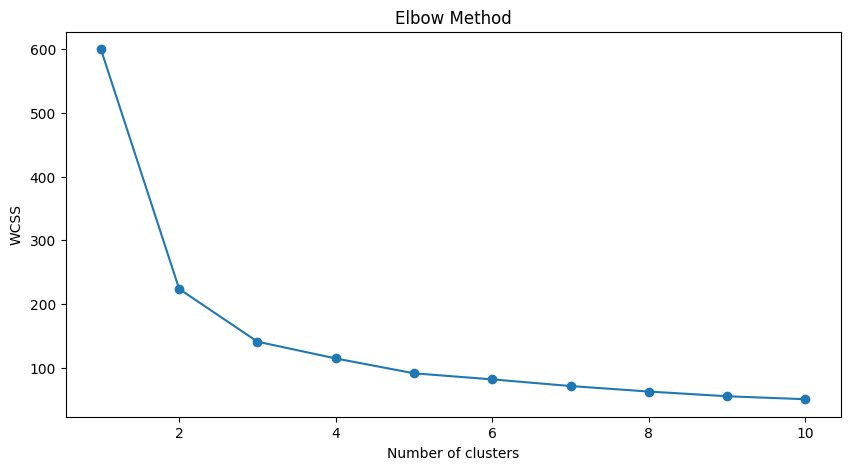

In [14]:
# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# Determine the Optimal Number of Clusters Using the Silhouette Method
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

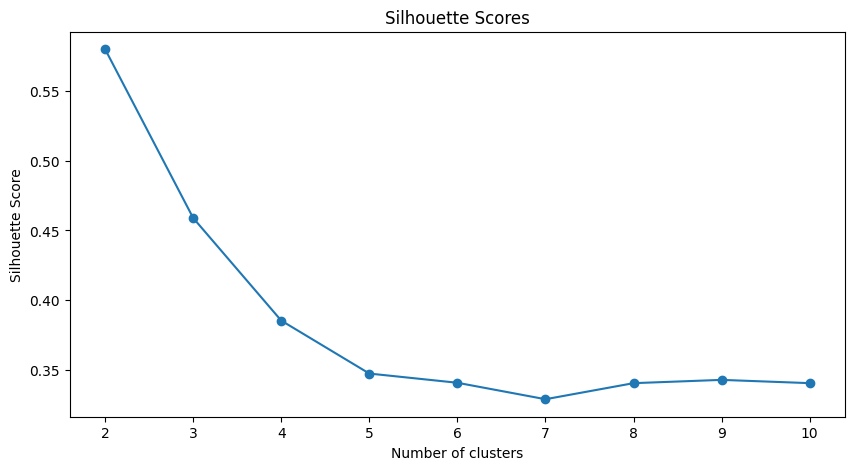

In [16]:
# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:
#Perform K-Means Clustering with the Optimal Number of Clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
iris_df['Cluster'] = cluster_labels

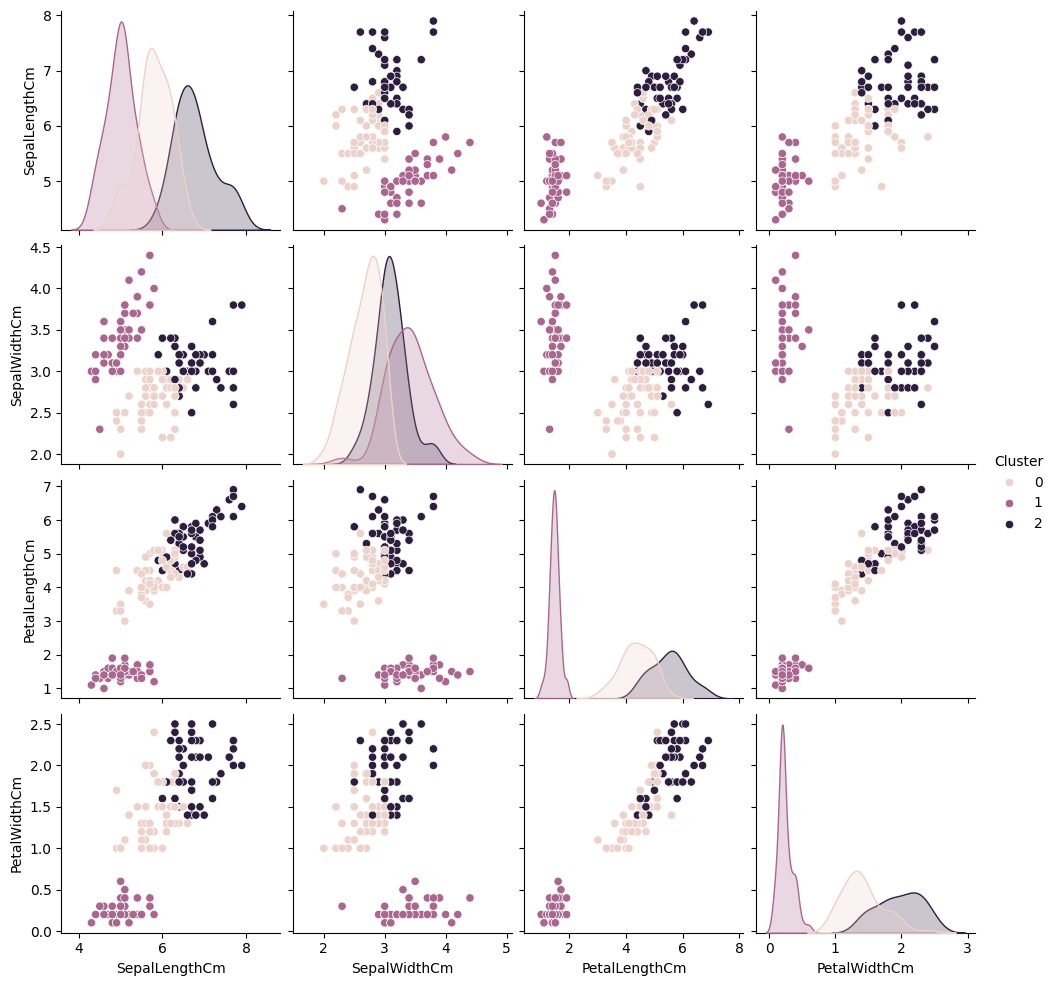

In [18]:
# Visualize the clusters
sns.pairplot(iris_df, hue='Cluster', vars=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
plt.show()

In [19]:
# Visualize the cluster centers
centers = kmeans.cluster_centers_

# Inverse transform the centers to the original scale
centers = scaler.inverse_transform(centers)

centers_df = pd.DataFrame(centers, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
centers_df['Cluster'] = range(optimal_clusters)

In [20]:
print(centers_df)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Cluster
0       5.801887      2.673585       4.369811      1.413208        0
1       5.006000      3.418000       1.464000      0.244000        1
2       6.780851      3.095745       5.510638      1.972340        2


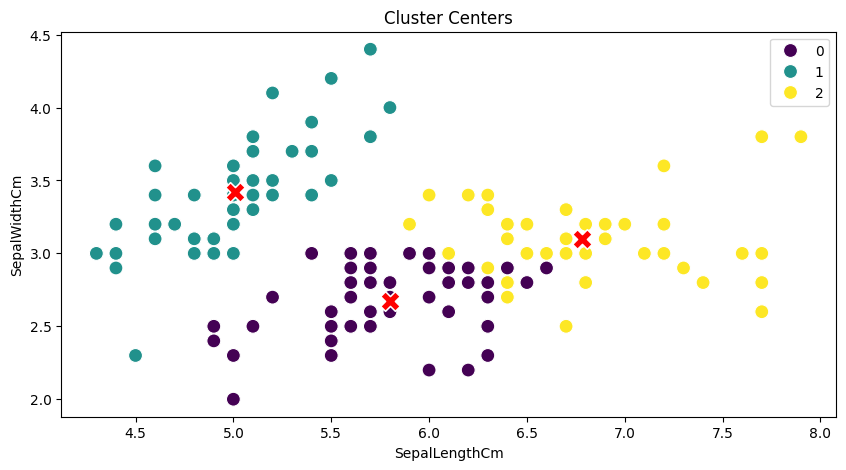

In [21]:
# Plot the cluster centers
plt.figure(figsize=(10, 5))
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', palette='viridis', s=100)
sns.scatterplot(data=centers_df, x='SepalLengthCm', y='SepalWidthCm', color='red', marker='X', s=200)
plt.title('Cluster Centers')
plt.show()